In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import os

In [2]:
normalized = transforms.Normalize((0.5,), (0.5,))
tensor = transforms.ToTensor()
transformation = transforms.Compose([tensor, normalized])

In [3]:
current_directory = os.getcwd()
training_dataset = datasets.MNIST(current_directory, download=True, train=True, transform=transformation)
testing_dataset = datasets.MNIST(current_directory, download=True, train=False, transform=transformation)

train_data = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=True)

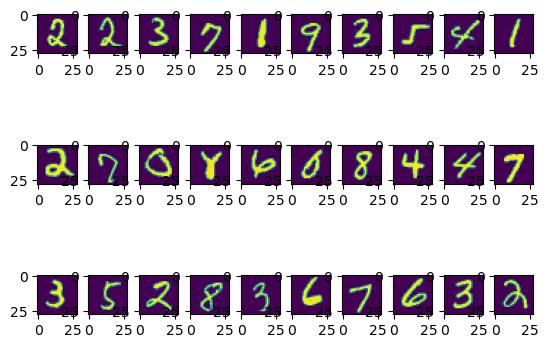

In [4]:
images, labels = next(iter(train_data))
for i in range(1, 31):
    plt.subplot(3,10, i)
    plt.subplots_adjust(wspace=0.3)
    plt.imshow(images[i].numpy().squeeze())

In [5]:
input_layer = 784
hidden_layer1 = 64
hidden_layer2 = 32
output_layer = 10

In [6]:
model = nn.Sequential(nn.Linear(input_layer, hidden_layer1),
nn.ReLU(),
nn.Linear(hidden_layer1,hidden_layer2),
nn.ReLU(),
nn.Linear(hidden_layer2, output_layer))

In [7]:
images = images.view(images.shape[0], -1)
outputs = model(images)
lossFunction = nn.CrossEntropyLoss()
loss = lossFunction(outputs, labels)

In [8]:
gradient_descent = optim.SGD(model.parameters(), lr=0.1)

In [9]:
epochs = 100
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)
        # Feed-Forward
        gradient_descent.zero_grad()
        loss = lossFunction(model(images), labels)
        # Back Propagation
        loss.backward()
        # Optimize the weights
        gradient_descent.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(labels)
    print("Iteration : ", epoch+1, end = "\t")
    print("Loss: ", epoch_loss)

Iteration :  1	Loss:  930.9929354935884
Iteration :  2	Loss:  385.3784455098212
Iteration :  3	Loss:  286.06554264202714
Iteration :  4	Loss:  241.33639735728502
Iteration :  5	Loss:  205.2318165972829
Iteration :  6	Loss:  183.49205691600218
Iteration :  7	Loss:  163.31686077918857
Iteration :  8	Loss:  149.0463789687492
Iteration :  9	Loss:  137.5410942195449
Iteration :  10	Loss:  129.99146968731657
Iteration :  11	Loss:  116.44130877347197
Iteration :  12	Loss:  109.74614177830517
Iteration :  13	Loss:  106.01990610174835
Iteration :  14	Loss:  96.68348746583797
Iteration :  15	Loss:  90.87584206089377
Iteration :  16	Loss:  84.81381730851717
Iteration :  17	Loss:  79.75961933413055
Iteration :  18	Loss:  78.95679966593161
Iteration :  19	Loss:  72.20813580974936
Iteration :  20	Loss:  71.67935586592648
Iteration :  21	Loss:  62.974009593599476
Iteration :  22	Loss:  63.7294712648727
Iteration :  23	Loss:  59.13547003007261
Iteration :  24	Loss:  54.24941478364053
Iteration :  25	L

In [10]:
def get_predicted_label(image):
    image = image.view(1, 28*28)
    with torch.no_grad():
        prediction_score = model(image)
    return np.argmax(prediction_score)

In [11]:
images, labels = next(iter(test_data))
print("Predicted Label: ", 
get_predicted_label(images[0]))
print("Actual Label: ", labels.numpy()[0])

Predicted Label:  tensor(2)
Actual Label:  2


In [12]:
totalCount = 0
accurateCount = 0
for images, labels in test_data:
    for i in range(len(labels)):
        predictedLabel = get_predicted_label(images[i])
        actualLabel = labels.numpy()[i]
        print("Predicted Label: ", predictedLabel, " / Actual Label: ", actualLabel)
        if(predictedLabel == actualLabel):
            accurateCount += 1
    totalCount += len(labels)
print("Total images tested: : ", totalCount)
print("Accurate predictions: ", accurateCount)
print("Accuracy percentage: ", ((accurateCount/totalCount)*100), "%")

Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(0)  / Actual Label:  0
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(3)  / Actual Label:  3
Predicted Label:  tensor(2)  / Actual Label:  2
Predicted Label:  tensor(8)  / Actual Label:  8
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(6)  / Actual Label:  6
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(9)  / Actual Label:  9
Predicted Label:  tensor(1)  / Actual Label:  1
Predicted Label:  tensor(5)  / Actual Label:  5
Predicted Label:  tensor(4)  / Actual Label:  4
Predicted Label:  tensor(7)  / Actual Label:  7
Predicted Label:  tensor(9)  / Actual La